# HW5 SVM and Kernel Methods -- Part 1 SVM Decision Boundaries

This part of the HW5 will allow you to understand
* how SVM works;
* how hyper-parameters control decision boundaries;
* how to use SVM models implemented in `sklearn`.

In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import sklearn.svm
from sklearn import datasets
import matplotlib.pyplot as plt

**Dataset**: We create a toy example using the Iris dataset from sklearn. In particular, we merge the first two classes to make it a binary classification problem. We only use two features for easy visualization. 

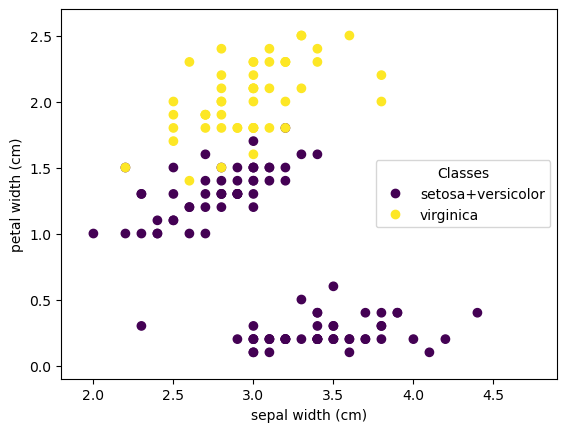

In [3]:

# We use the IRIS dataset but only use two features
iris = datasets.load_iris()
real_label = iris.target

# Merge class zero and one to make a binary classification problem
y = (real_label > 1).astype(np.int32)
X = iris.data
X = X[:, [1, 3]]

# Plot the data

feature_names = [iris.feature_names[1], iris.feature_names[3]]
target_names = [iris.target_names[0] + "+" + iris.target_names[1], iris.target_names[2]]

_, ax = plt.subplots()
ax.set_xlim(1.8, 4.9)
ax.set_ylim(-0.1, 2.7)
scatter = ax.scatter(X[:, 0], X[:, 1], c=y)
ax.set(xlabel=feature_names[0], ylabel=feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], target_names, loc="right", title="Classes"
)

## Report Question 1: Comparing SVM and Logistic Regression

In this question, we train three models:
* SVM
* Logistic Regression (LR)
* Ridge Regression (RR)

They are all linear models and only differ by the loss used in the training objective. In general, we should not apply a regression model to a classification problem. But here we do so and compare it with two other classification models. 

**Question 1a (1 point)** Please fix the code below and plot of decision boundaries from the three models. Please put the plot in your report. 

**Question 1b (4 points)**: Which two models decision boundaries are more similar? Please explain why. 

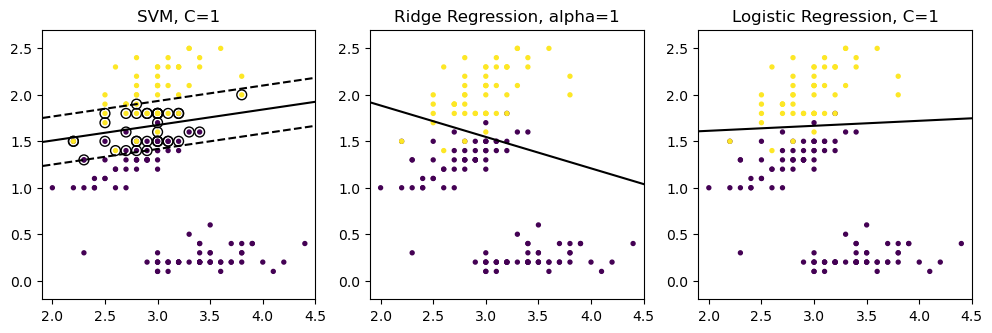

In [8]:
# 
from util import plot_training_data_with_decision_boundary
svm = sklearn.svm.SVC(C=1, kernel='linear')
rr = sklearn.linear_model.Ridge(alpha=1.0)
lr = sklearn.linear_model.LogisticRegression(C=1)

svm.fit(X,y)
rr.fit(X, y * 2 - 1) # (no points) why fitting y is an even worse choice? You can try it.
lr.fit(X, y)

fig, axs = plt.subplots(1, 3, layout=None, figsize=(12, 3.5))

plot_training_data_with_decision_boundary(axs.flat[0], "SVM, C=1", svm, X, y, is_svm=True)
plot_training_data_with_decision_boundary(axs.flat[1], "Ridge Regression, alpha=1", rr, X, y, is_regression=True)
plot_training_data_with_decision_boundary(axs.flat[2], "Logistic Regression, C=1", lr, X, y)



## Report Question 2: Margin Width and the Hyperparameter C

In this question, we fit SVM with three C settings C=0.1, 1, 10. Please check the differences of decision boundaries and the width of their margins. In the plot, a data point with marked by circle is a "support vector", which is either in the margin, or on the wrong side of the decision boundary.  

**Question 2a (1 point)**: Please fix the code below and plot of decision boundaries from the three models. Please use proper figure titles like those given in the last question. You need to put the plot in your report. 

**Question 2b (4 points)**: Which C gives the widest margin? Please explain how C is related to the margin width. Your answer needs to show the formula of calculating the margin width.   

**Question 2c (4 points)**: Which C gives the least number of support vectors. Can you explain why? You are supposed to form your explanation from the training objective of SVM.    


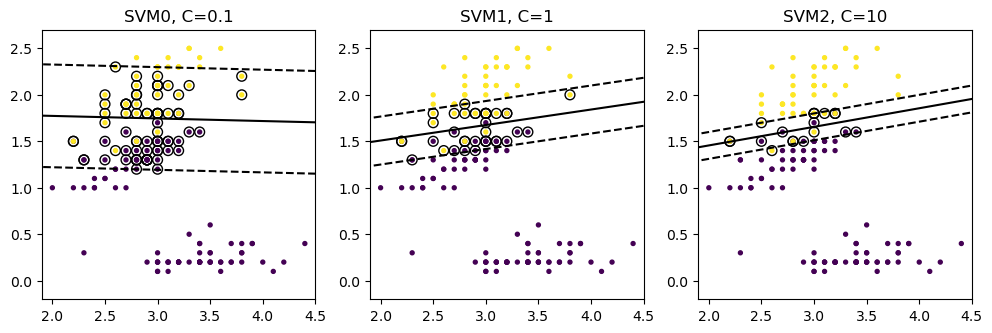

In [14]:
# 
svm0 = sklearn.svm.SVC(C=0.1, kernel='linear')
svm1 = sklearn.svm.SVC(C=1, kernel='linear')
svm2 = sklearn.svm.SVC(C=10, kernel='linear')

svm0.fit(X,y)
svm1.fit(X,y)
svm2.fit(X,y)

fig, axs = plt.subplots(1, 3, layout=None, figsize=(12, 3.5))

plot_training_data_with_decision_boundary(axs.flat[0], "SVM0, C=0.1", svm0, X, y, is_svm=True)
plot_training_data_with_decision_boundary(axs.flat[1], "SVM1, C=1", svm1, X, y, is_svm=True)
plot_training_data_with_decision_boundary(axs.flat[2], "SVM2, C=10", svm2, X, y, is_svm=True)


## Report Question 3: Support Vectors and the Decision Boundary 

**Property**: The decision boundary of an SVM is decided by support vectors only. 

**Question 3a (1 point)**: Please fix the code below and plot of decision boundaries from the two models. Please put the plot in your report. 

**Question 3b (2 points)**: Are the two boundaries the same even if some data points are removed from the training set of the second SVM? (For this question, you don't need to explain why -- it is a complex problem related to the KKT condition in constrained optimization). 

**Question 3c (3 points)**: What's the benefit of the property above in terms of model storage and predicting speed? 


Decision boundaries are exactly the same.


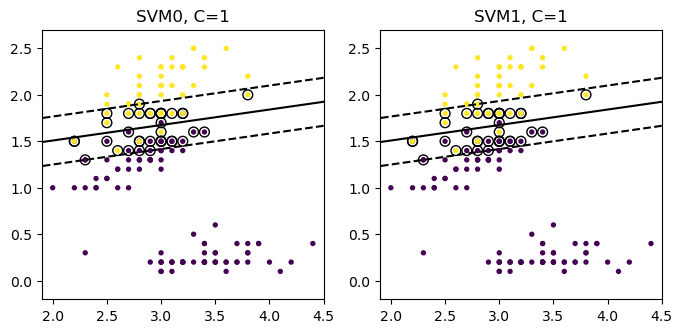

In [18]:
svm0 = sklearn.svm.SVC(C=1, kernel='linear')
svm1 = sklearn.svm.SVC(C=1, kernel='linear')

svm0.fit(X, y)

X_reduced = X[real_label != 0]
y_reduced = y[real_label !=0]

svm1.fit(X_reduced, y_reduced)

fig, axs = plt.subplots(1, 2, layout=None, figsize=(8, 3.5))

plot_training_data_with_decision_boundary(axs.flat[0], "SVM0, C=1", svm0, X, y, is_svm=True)
plot_training_data_with_decision_boundary(axs.flat[1], "SVM1, C=1", svm1, X, y, is_svm=True)

import numpy as np

# Get coefficients and intercepts for both SVM models
coef_svm0 = svm0.coef_.flatten()
intercept_svm0 = svm0.intercept_

coef_svm1 = svm1.coef_.flatten()
intercept_svm1 = svm1.intercept_

# Check if coefficients and intercepts are the same
if np.allclose(coef_svm0, coef_svm1) and np.allclose(intercept_svm0, intercept_svm1):
    print("Decision boundaries are exactly the same.")
else:
    print("Decision boundaries are not exactly the same.")


## Report Question 4: Kernalized SVMs

By using a non-linear kernel function, an SVM has the ability to learn a non-linear decision boundary. 

**Question 4a (1 point)**: Please fix the code below and plot of decision boundaries from the three models. Please put the plot in your report. 

**Question 4b (1 points)**: Which model has a linear decision boundary? No need to explain why.

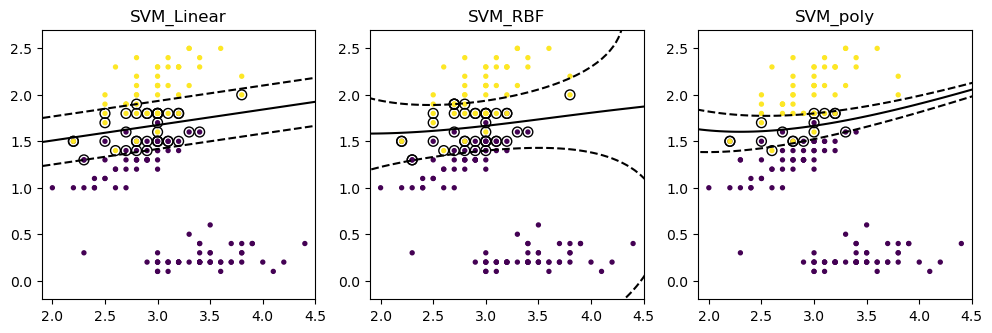

In [21]:
# 
svm_linear = sklearn.svm.SVC(C=1, kernel='linear')
svm_rbf = sklearn.svm.SVC(C=1, kernel='rbf')
svm_poly = sklearn.svm.SVC(C=1, kernel='poly')

svm_linear.fit(X,y)
svm_rbf.fit(X,y)
svm_poly.fit(X,y)

fig, axs = plt.subplots(1, 3, layout=None, figsize=(12, 3.5))

plot_training_data_with_decision_boundary(axs.flat[0], "SVM_Linear", svm_linear, X, y, is_svm=True)
plot_training_data_with_decision_boundary(axs.flat[1], "SVM_RBF", svm_rbf, X, y, is_svm=True)
plot_training_data_with_decision_boundary(axs.flat[2], "SVM_poly", svm_poly, X, y, is_svm=True)


## Report Question 5: Hyper-Parameters in Kernelized SVM

By using a non-linear kernel function, an SVM has the ability to learn a non-linear decision boundary. 

**Implementation 5.1 (10 points)**: You need to implement the RBF kernel function to understand it. Please refer to `custorm_svm_kernel.py`. 

**Question 5a (1 point)**: Please fix the code below and plot of decision boundaries from six SVM models with different hyperparameters. Please put the plot in your report. 

**Question 5b (4 points)**: If you want to INCREASE overfitting and reduce training error, how should you adjust the hyperparameter C? Please explain why.

**Question 5c (3 points)**: If you want to INCREASE overfitting and reduce training error, how should you adjust the hyperparameter gamma? Suppose a training set has NO two instances exactly the same, can you set a gamma such that the SVM with RBF kernel achieve zero error? Please explain why to both questions. (Hint: Fact: an instance's kernel value with itself is always 1. When gamma is large enough, an instance's kernel value with other instances will be near zero. Please also check the predictive formula of a kernelized SVM.)   

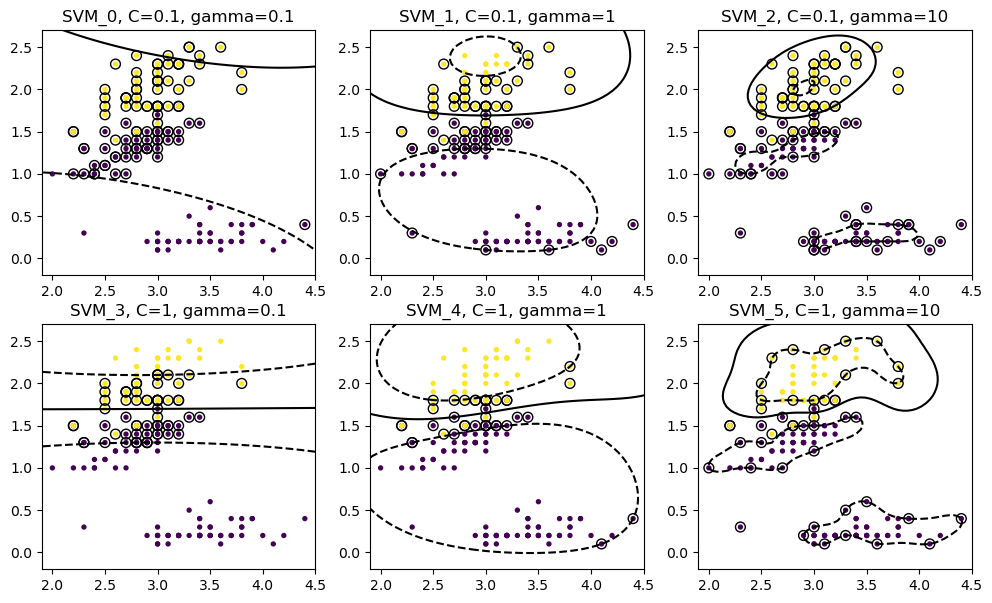

In [27]:
svm_0 = sklearn.svm.SVC(C=0.1, kernel='rbf', gamma=0.1)
svm_1 = sklearn.svm.SVC(C=0.1, kernel='rbf', gamma=1)
svm_2 = sklearn.svm.SVC(C=0.1, kernel='rbf', gamma=10)

svm_3 = sklearn.svm.SVC(C=1, kernel='rbf', gamma=0.1)
svm_4 = sklearn.svm.SVC(C=1, kernel='rbf', gamma=1)
svm_5 = sklearn.svm.SVC(C=1, kernel='rbf', gamma=10)

svms = [svm_0, svm_1, svm_2, svm_3, svm_4, svm_5]

for svm in svms:
        svm.fit(X,y)

fig, axs = plt.subplots(2, 3, layout=None, figsize=(12, 7))

for i, svm in enumerate(svms):
        row = i//3
        col = i % 3
        C=1
        if(i < 3):
                C = 0.1
        gamma = 0.1
        if(i%3 == 1):
                gamma = 1
        if(i%3 == 2):
                gamma = 10
        
        plot_training_data_with_decision_boundary(axs[row][col], f"SVM_{i}, C={C}, gamma={gamma}", svm, X, y, is_svm=True)